## Imports

In [1]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings

# Ignore DeprecationWarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Ignore FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Ignore UserWarnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
# fetching dataset - 1
df1 = pd.read_excel('Dataset_EV.xlsx')
df1.head()

Unnamed: 0       Brand                          Model  AccelSec  \
0           0       Tesla  Model 3 Long Range Dual Motor       4.6   
1           1  Volkswagen                      ID.3 Pure      10.0   
2           2    Polestar                              2       4.7   
3           3         BMW                            iX3       6.8   
4           4       Honda                              e       9.5   

   TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0           233       450              161             940         Yes   
1           160       270              167             250          No   
2           210       400              181             620         Yes   
3           180       360              206             560         Yes   
4           145       170              168             190         Yes   

  PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  
0        AWD  Type 2 CCS      Sedan       D      5      55480  
1        RWD  Type 2 CCS  Hatchback       C      5      30000  
2        AWD  Type 2 CCS   Liftback       D      5      56440  
3        RWD  Type 2 CCS        SUV       D      5      68040  
4        RWD  Type 2 CCS  Hatchback       B      4      32997

In [3]:
df1.shape

(71, 15)

In [4]:
df1.info

<bound method DataFrame.info of     Unnamed: 0       Brand                          Model  AccelSec  \
0            0       Tesla  Model 3 Long Range Dual Motor       4.6   
1            1  Volkswagen                      ID.3 Pure      10.0   
2            2    Polestar                              2       4.7   
3            3         BMW                            iX3       6.8   
4            4       Honda                              e       9.5   
..         ...         ...                            ...       ...   
66          66      Nissan                 e-NV200 Evalia      14.0   
67          67       Tesla          Cybertruck Dual Motor       5.0   
68          68     Renault              Kangoo Maxi ZE 33      22.4   
69          69        Ford          Mustang Mach-E ER AWD       6.0   
70          70         BMW                     i3s 120 Ah       6.9   

    TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0            233       450              

In [5]:
df1 = df1.drop('Unnamed: 0', axis=1)

In [6]:
df1.info

<bound method DataFrame.info of          Brand                          Model  AccelSec  TopSpeed_KmH  \
0        Tesla  Model 3 Long Range Dual Motor       4.6           233   
1   Volkswagen                      ID.3 Pure      10.0           160   
2     Polestar                              2       4.7           210   
3          BMW                            iX3       6.8           180   
4        Honda                              e       9.5           145   
..         ...                            ...       ...           ...   
66      Nissan                 e-NV200 Evalia      14.0           123   
67       Tesla          Cybertruck Dual Motor       5.0           190   
68     Renault              Kangoo Maxi ZE 33      22.4           130   
69        Ford          Mustang Mach-E ER AWD       6.0           180   
70         BMW                     i3s 120 Ah       6.9           160   

    Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
0        450       

In [7]:
# getting a statistical summary of the datasets
df1.describe()

AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  71.000000     71.000000   71.000000        71.000000       71.000000   
mean    7.440845    179.830986  347.746479       183.267606      449.436620   
std     3.256842     47.554476  138.256461        25.986787      222.959877   
min     2.100000    123.000000  130.000000       104.000000      170.000000   
25%     5.000000    150.000000  250.000000       166.000000      235.000000   
50%     7.500000    160.000000  350.000000       178.000000      420.000000   
75%     9.000000    200.000000  425.000000       196.000000      580.000000   
max    22.400000    410.000000  970.000000       267.000000      940.000000   

           Seats      PriceEuro  
count  71.000000      71.000000  
mean    4.915493   55516.253521  
std     0.691716   35384.065185  
min     4.000000   20129.000000  
25%     5.000000   33608.500000  
50%     5.000000   41526.000000  
75%     5.000000   65310.000000  
max     7.000000  215000.000000

In [8]:
import pandas as pd
from dataprep.eda import create_report

# Generate a report
report = create_report(df1)

# Save the report to an HTML file
report.save('report.html')

  0%|                                                                                         | 0/1900 [00:00<…

C:\Users\Akshay Karadkar\anaconda3\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Report has been saved to report.html!


## Analysis of EVs based on brands

Observation: Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.

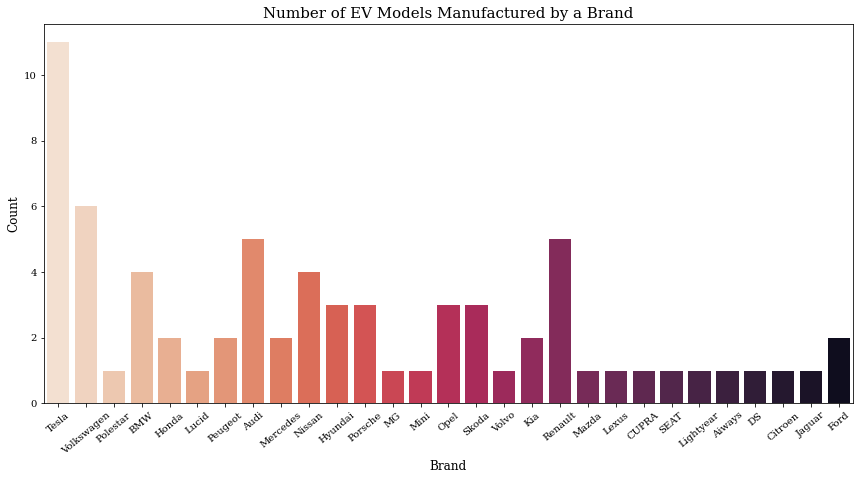

In [9]:
# Create a count plot of EV models by brand
sns.catplot(data=df1, x='Brand', kind='count', palette='rocket_r', height=6, aspect=2)

# Remove the spines on the right and top of the plot
sns.despine(right=False, top=False)

# Rotate x-axis labels by 40 degrees for better readability
plt.tick_params(axis='x', rotation=40)

# Set x and y axis labels and their font family and size
plt.xlabel('Brand', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)

# Set font family for x and y axis tick labels
plt.xticks(family='serif')
plt.yticks(family='serif')

# Set title and its font family and size
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)

# Save the plot as a PNG file
plt.savefig('Number of EV Models Manufactured by a Brand.png')

# Display the plot
plt.show()

## Anaysis of different body types of EVs

##### Observation: SUV and Hatchback body types form the majority while Station and MPV the minority.

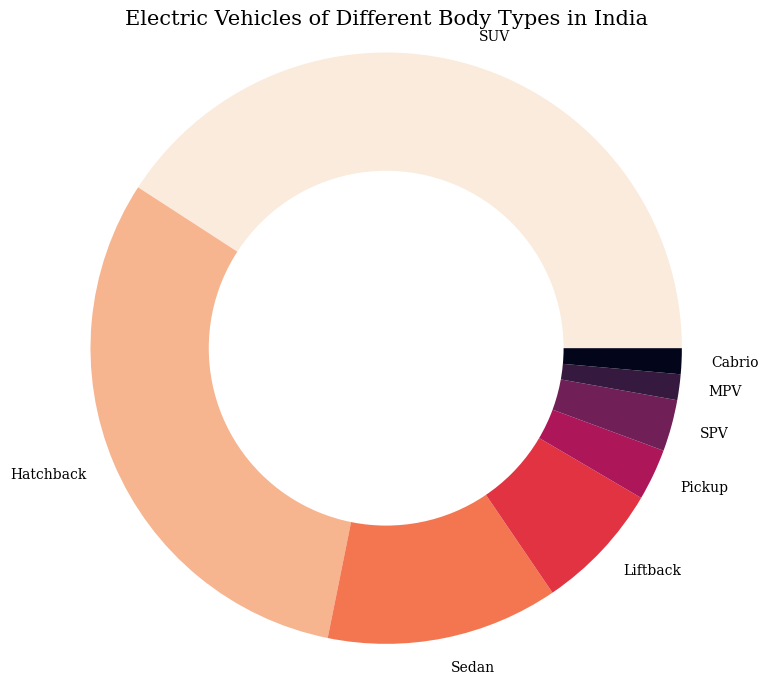

In [10]:
# count the number of each body style and plot a pie chart
body_style_counts = df1['BodyStyle'].value_counts()
pie_chart = body_style_counts.plot.pie(radius=2, cmap='rocket_r', startangle=0, textprops=dict(family='serif'))

# add a white circle to the center of the pie chart to make it look like a donut chart
plt.pie(x=[1], radius=1.2, colors='white')

# add a title and axis labels
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')

# Save the plot as a PNG file
plt.savefig('Electric Vehicles of Different Body Types in India.png')

# display the chart
plt.show()

### Analysis of different segments of EVs

#### Observation: B and C body segments form the majority while S and A the minority.

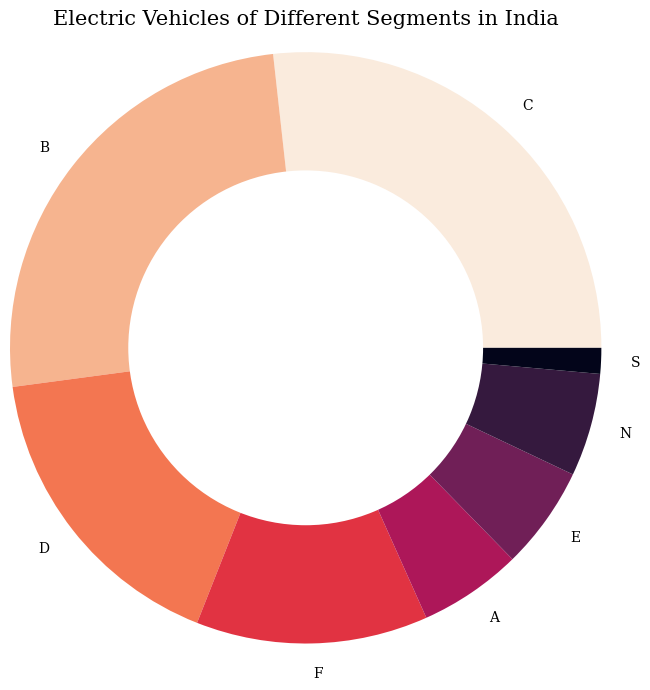

In [11]:
# Get the counts for each segment and plot a pie chart
segment_counts = df1['Segment'].value_counts()
pie_chart = segment_counts.plot.pie(radius=2, cmap='rocket_r', startangle=0, textprops=dict(family='serif'), pctdistance=.5)

# Add a white circle to the center of the pie chart to make it look like a donut chart
plt.pie(x=[1], radius=1.2, colors='white')

# Add a title and axis labels
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=100)
plt.ylabel('')

# Save the plot as a PNG file
plt.savefig('Electric Vehicles of Different Segments in India.png')

# Display the chart
plt.show()


## Analysis of EVs of different number of seats

Observation: EVs with 5 sitters dominate the market while EVs with 2 sitters are less in number.

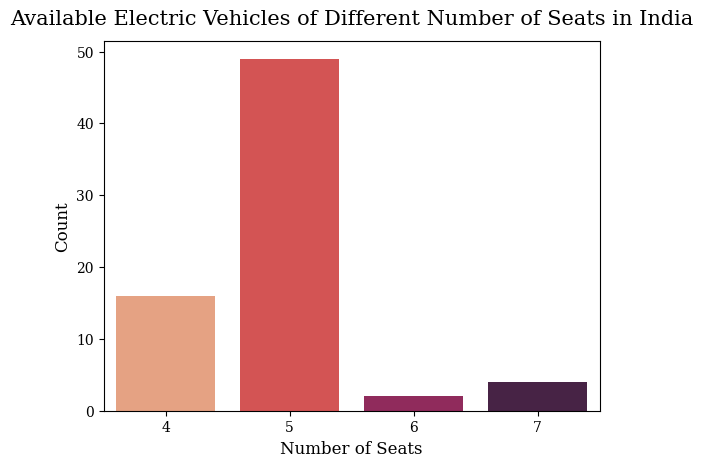

In [12]:
# Create a countplot of the number of seats
sns.countplot(data=df1, x='Seats', palette='rocket_r')

# Add axis labels and ticks, and a title
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)

# Save the plot as a PNG file
plt.savefig('Available Electric Vehicles of Different Number of Seats in India.png')

# Display the chart
plt.show()

## Analysis of the number of seats by each brand

Observation: Based on the number of seats, Tesla, Mercedes and Nissan have the maximum number of seats and Smart the minimum.

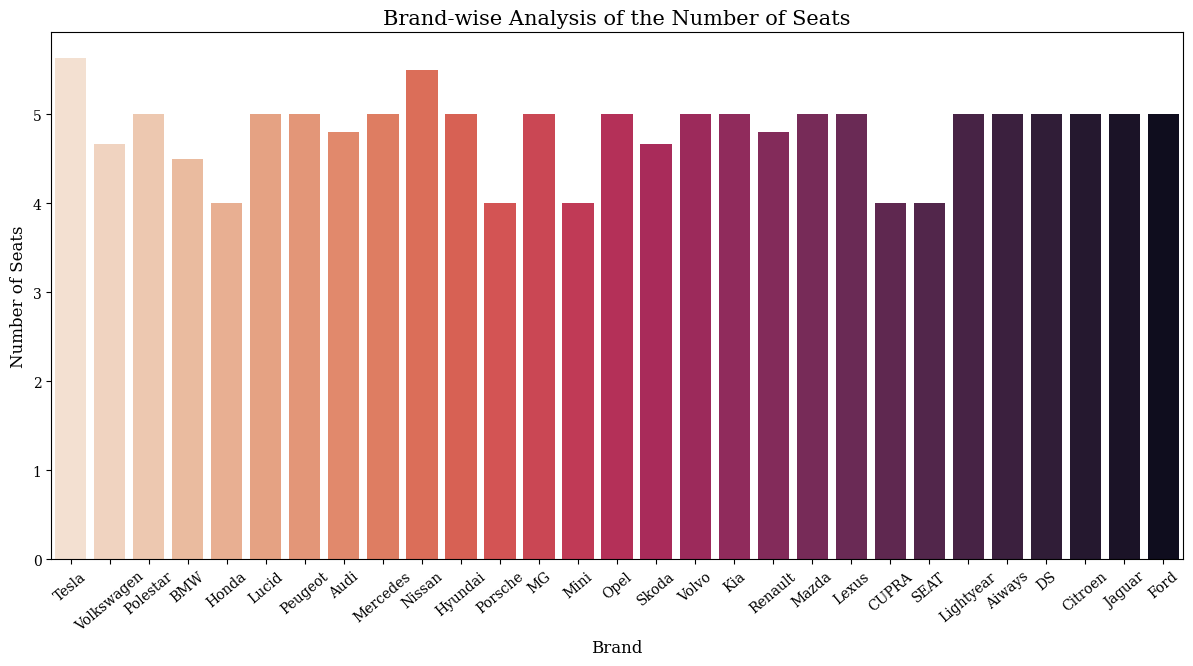

In [13]:
# Create a bar plot of the number of seats by brand
sns.catplot(kind='bar', data=df1, x='Brand', y='Seats', palette='rocket_r', ci=None, height=6, aspect=2)

# Remove spines from the plot and rotate the x-axis labels
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)

# Add axis labels and ticks, and a title
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15)

# Save the plot as a PNG file
plt.savefig('Brand-wise Analysis of the Number of Seats.png')

# Display the chart
plt.show()

## Analysis of different plug types

Observation: EVs with plus type of 'Type 2 CCS' seem to dominate the market.

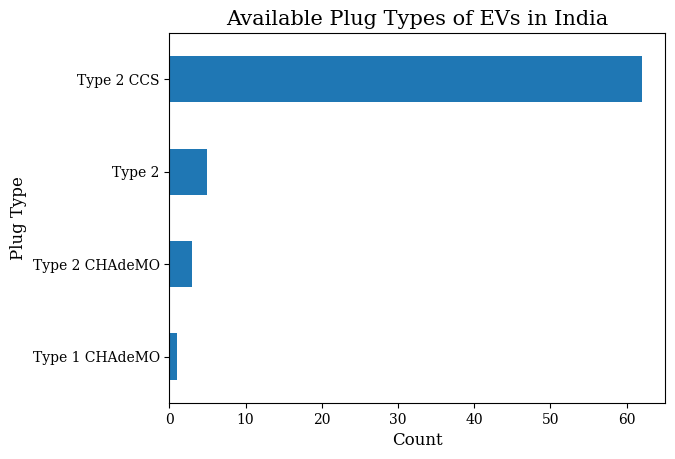

In [14]:
# plug types visualization from dataset

# Count the number of each plug type and plot a horizontal bar chart
plug_type_counts = df1['PlugType'].value_counts().sort_values(ascending=True)
plug_type_counts.plot.barh()

# Add axis labels and ticks, and a title
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)

# Save the plot as a PNG file
plt.savefig('Available Plug Types of EVs in India.png')

# Display the chart
plt.show()


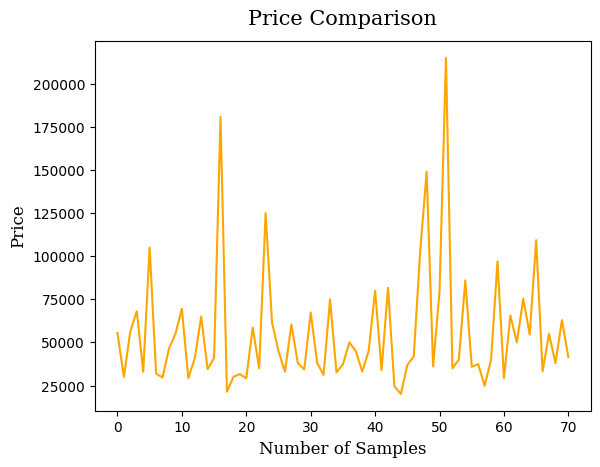

In [15]:
# plotting the price from dataset

# Plot the price data
plt.plot(df1['PriceEuro'], color='orange')

# Add axis labels and a title
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12)

# Save the plot as a PNG file
plt.savefig('Price Comparison.png')

# Display the chart
plt.show()

## Analysis of EVs based on accleration

Observation: Based on accleration, EVs from Renault, Seat and Smart are the top performers while Tesla, Lucid and Porsche dont make it to the same.

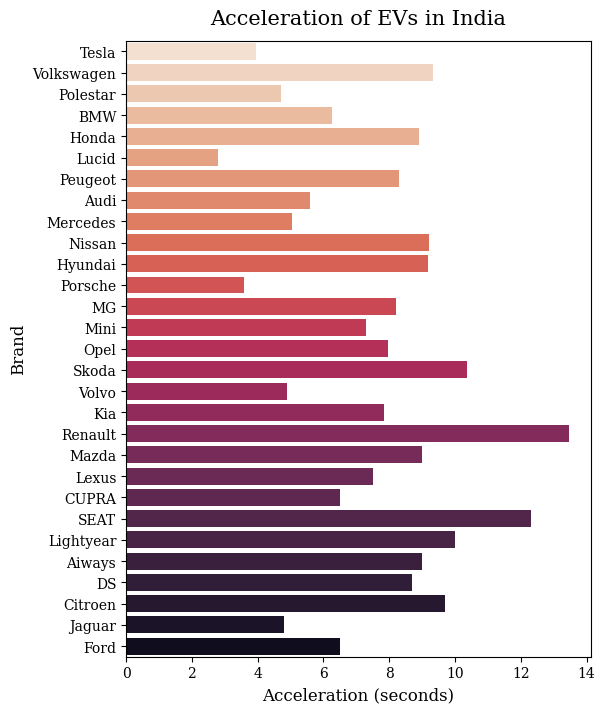

In [16]:
# accleration visualization from dataset

# Create a bar chart of acceleration by brand
plt.figure(figsize=(6, 8))
sns.barplot(data=df1, y='Brand', x='AccelSec', ci=None, palette='rocket_r')

# Add axis labels and a title
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Acceleration (seconds)', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Acceleration of EVs in India', family='serif', size=15, pad=12)

# Save the plot as a PNG file
plt.savefig('Acceleration of EVs in India.png')

# Display the chart
plt.show()

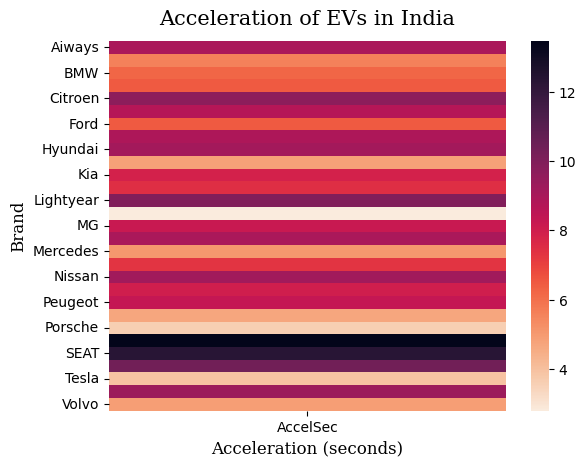

In [17]:
# Create a heatmap of acceleration by brand
accel_by_brand = df1.pivot_table(values='AccelSec', index='Brand', aggfunc='mean')
sns.heatmap(accel_by_brand, cmap='rocket_r')

# Add axis labels and a title
plt.xlabel('Acceleration (seconds)', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title('Acceleration of EVs in India', family='serif', size=15, pad=12)

# Save the plot as a PNG file
plt.savefig('Acceleration of EVs in India Heat Map.png')

# Display the chart
plt.show()


## Analysis of EVs based on speed

Observation: Based on speed parameter, EVs from Tesla, Lucid and Porsche are the top performers while Renault, Smart and SEAT dont make it to the same.

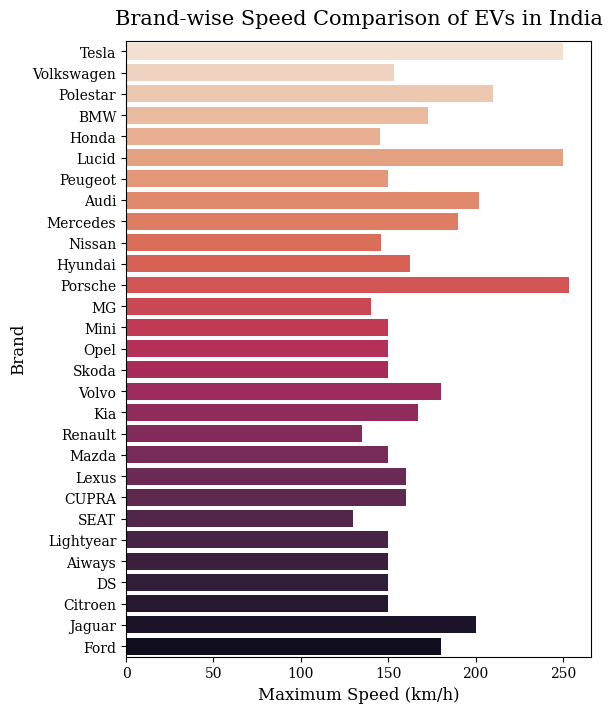

In [18]:
# speed visualization from dataset 3

# Create a bar chart of top speed by brand
plt.figure(figsize=(6, 8))
sns.barplot(data=df1, x='TopSpeed_KmH', y='Brand', ci=None, palette='rocket_r')

# Add axis labels and a title
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Maximum Speed (km/h)', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)

# Save the plot as a PNG file
plt.savefig('Brand-wise Speed Comparison of EVs in India.png')

# Display the chart
plt.show()


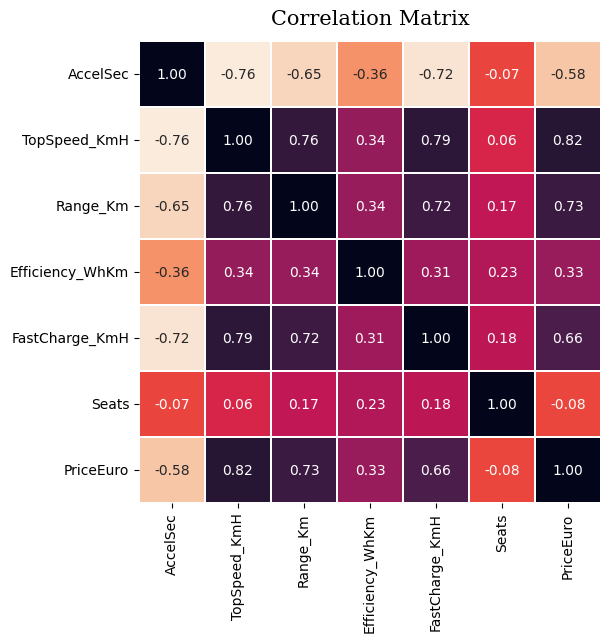

In [19]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(data=df1.corr(), annot=True, cmap='rocket_r', cbar=False, square=True, fmt='.2f', linewidths=0.3)

# Add a title
plt.title('Correlation Matrix', family='serif', size=15, pad=12)

# Save the plot as a PNG file
plt.savefig('Correlation Matrix.png')

# Display the chart
plt.show()


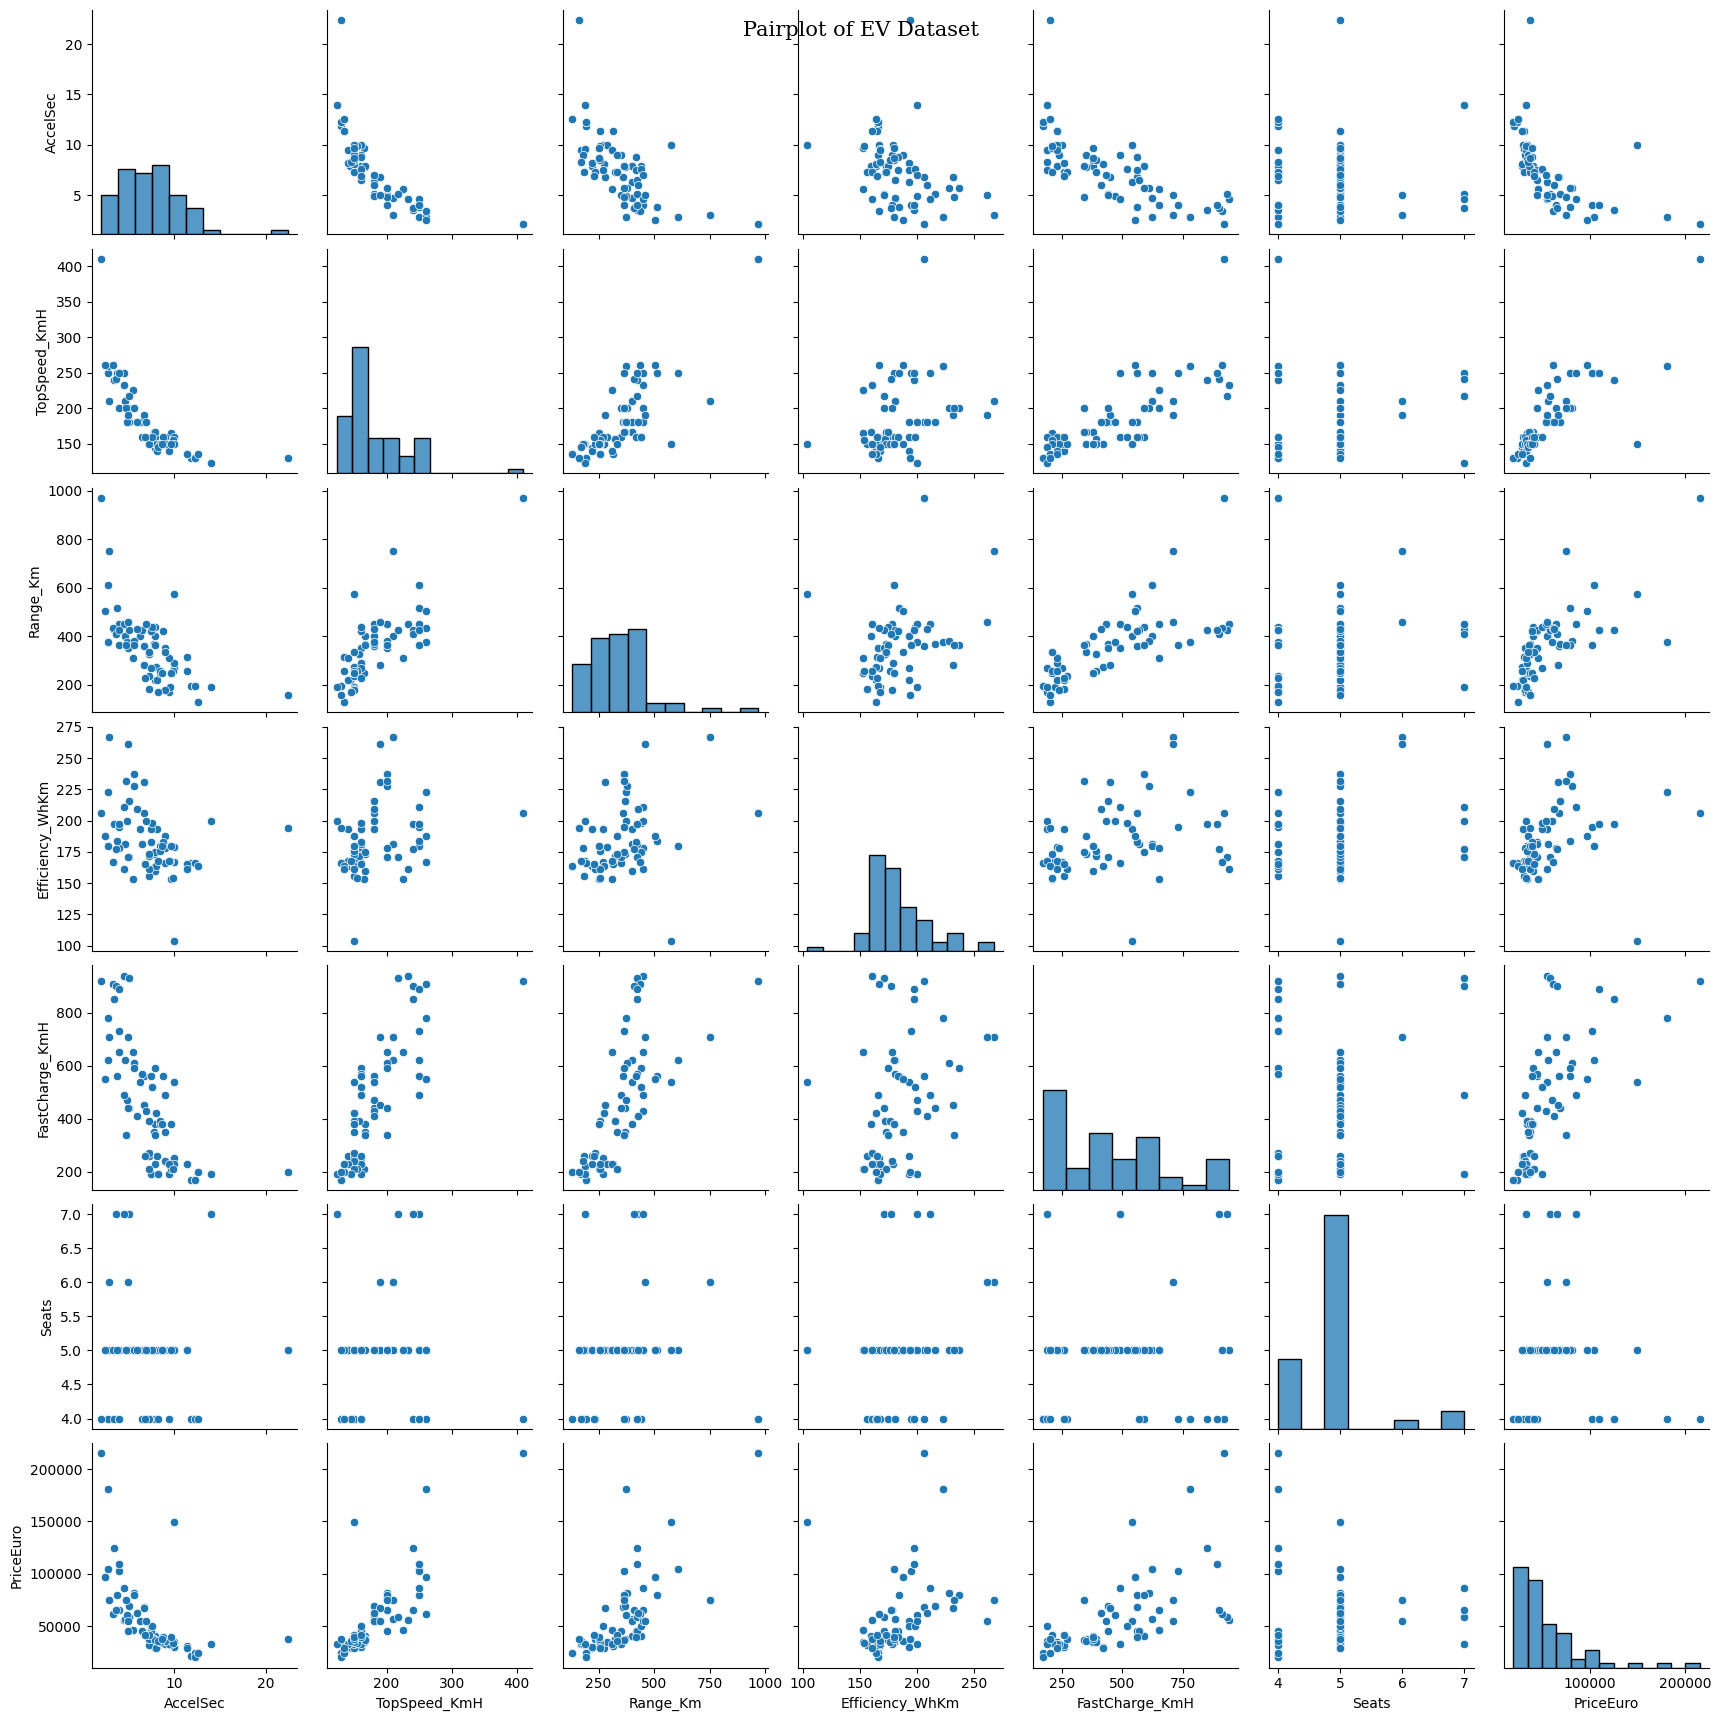

In [20]:
# Create a pairplot of the dataset
sns.pairplot(df1, diag_kind='hist', palette='rocket_r')

# Add a title
plt.suptitle('Pairplot of EV Dataset', family='serif', size=15)

# Save the plot as a PNG file
plt.savefig('Pairplot of EV Dataset.png')

# Display the chart
plt.show()


## Analysis of EVs based on the range parameter

Observation: Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.

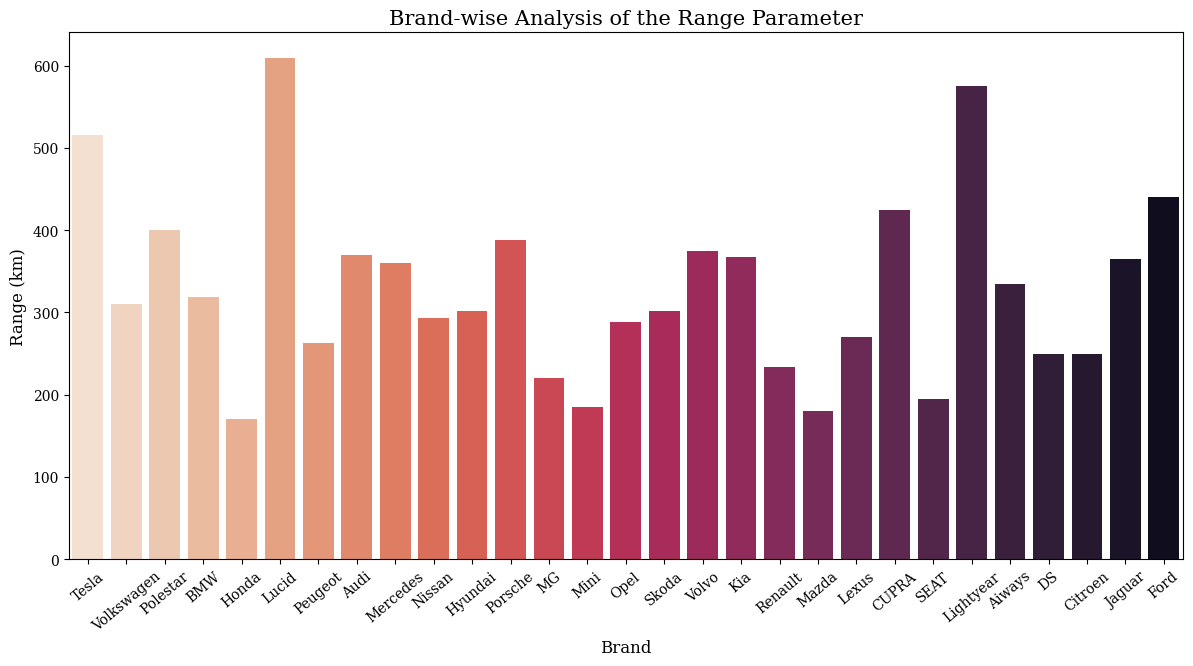

In [21]:
# Create a bar chart of range by brand
sns.catplot(kind='bar', data=df1, x='Brand', y='Range_Km', palette='rocket_r', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)

# Add axis labels and a title
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand', family='serif', size=12)
plt.ylabel('Range (km)', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15)

# Save the plot as a PNG file
plt.savefig('Brand-wise Analysis of the Range Parameter.png')


# Display the chart
plt.show()


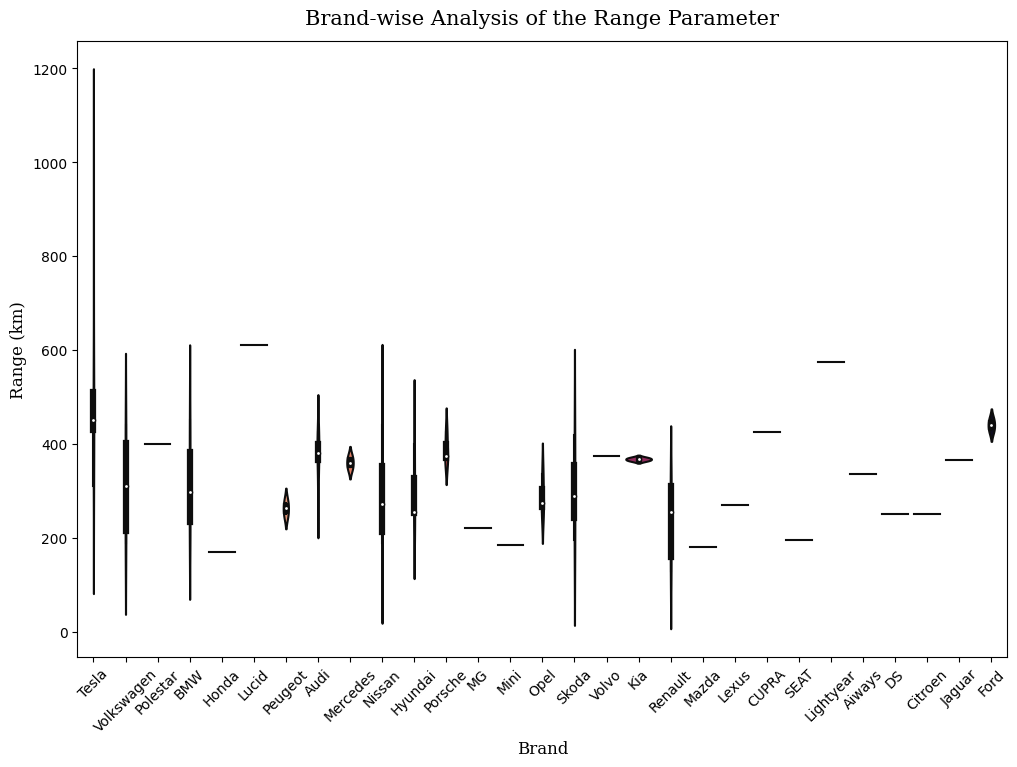

In [22]:
# Create a violin plot of range by brand

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a violin plot of range by brand
sns.violinplot(data=df1, x='Brand', y='Range_Km', palette='rocket_r')

# Adjust the rotation of the x-tick labels
plt.xticks(rotation=45)

# Add axis labels and a title
plt.xlabel('Brand', family='serif', size=12)
plt.ylabel('Range (km)', family='serif', size=12)
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15, pad=12)

# Save the plot as a PNG file
plt.savefig('Brand-wise Analysis of the Range Parameter Violin Plot.png')

# Display the chart
plt.show()



## Model Building Using K-Means Clusteing

In [23]:
# encoding the categorical features

# PowerTrain feature
df1['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df1['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [24]:
# selecting features for building a model
X = df1[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [25]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:

# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.282410 -0.431852 -0.830521  1.154296  0.370118 -0.900170  0.880863   
1 -2.284451 -0.016974  1.106009  1.067191 -0.663382  0.251894 -0.102579   
2  1.524867  0.079217 -0.489318  0.111507  0.465288 -0.728934  0.000785   
3  0.280524 -0.176948 -0.275816 -0.499642 -1.595443  0.505836  0.444995   
4 -2.443790 -1.334078 -0.498172 -0.880219 -0.352548 -0.075354 -0.005141   

        PC8       PC9  
0 -0.751800 -0.404941  
1  0.458870 -0.149152  
2 -0.323483 -0.242244  
3  0.464861  0.394000  
4  0.469957 -0.051529

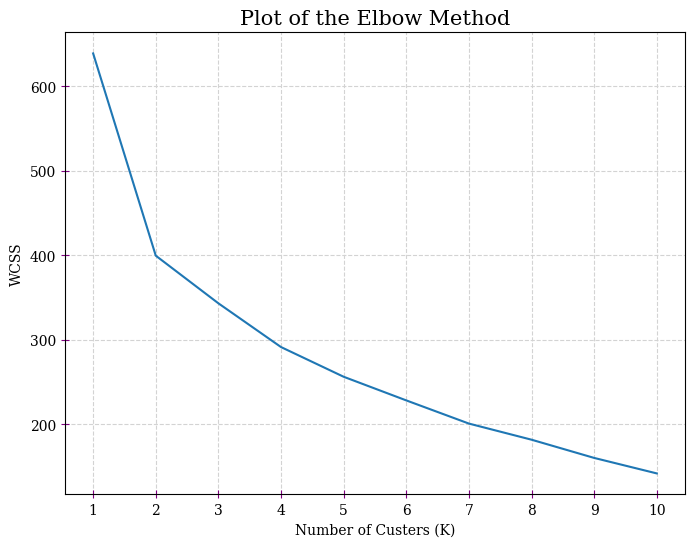

In [27]:
# plotting the results of Elbow
# !pip install -U threadpoolctl
# !pip uninstall scikit-learn
# !pip install scikit-learn

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')

# Save the plot as a PNG file
plt.savefig('Plot of the Elbow Method.png')

plt.show()

In [28]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [29]:
# check the labels assigned to each data point
print(kmean.labels_)

[1 0 2 3 3 1 0 0 3 2 2 3 3 3 0 3 1 3 0 3 3 2 3 1 1 3 3 2 0 0 2 3 3 2 3 3 3
 0 0 0 1 3 2 3 3 3 3 1 1 0 2 1 3 3 2 3 3 0 3 1 0 2 3 2 0 1 3 2 0 2 3]


In [30]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

3    31
0    15
2    14
1    11
dtype: int64

In [31]:
# adding a new feature of cluster labels to the dataset 3
df1['clusters'] = kmean.labels_

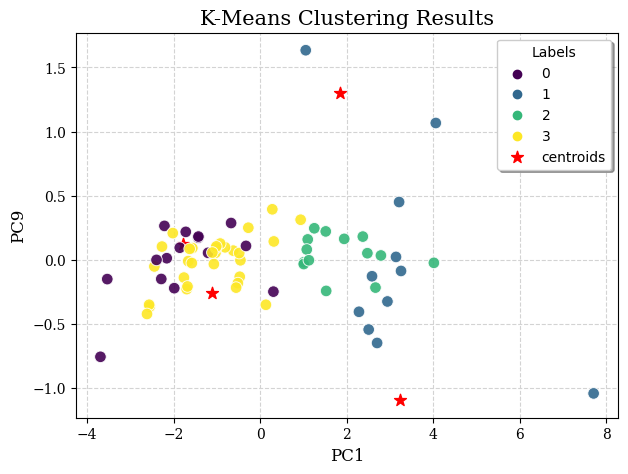

In [32]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)

# Save the plot as a PNG file
plt.savefig('K-Means Clustering Results.png')


plt.show()